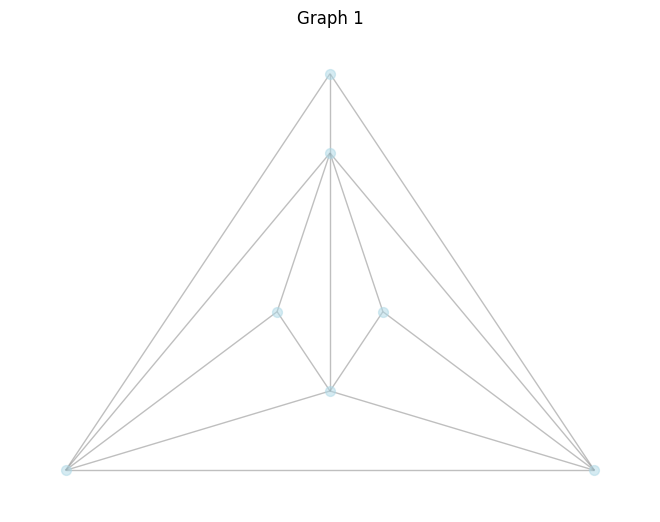

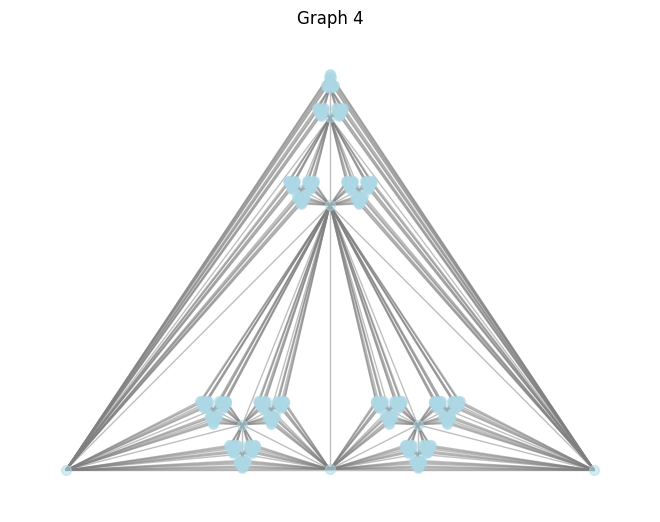

In [94]:
# Build apollonian networks

import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import circlify

def planar_draw(G,itt):
    pos = nx.planar_layout(G)
     # Draw the graph
    nx.draw(G, node_color='lightblue', pos=pos, edge_color='gray', node_size=50, with_labels=False, alpha = 0.5)
    plt.title(f"Graph {itt}")
    plt.show()
    
def create_apollonian_2its():
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes
    G.add_nodes_from([1, 2, 3, 4,5,6,7])
    
    # Add edges to form a triangle
    G.add_edges_from([(1, 2), (2, 3), (3, 1),(4,1),(4,2),(4,3),(5,4),(5,3),(5,1),(6,4),(6,3),(6,2),(7,1),(7,4),(7,2)])
    
    planar_draw(G,1)
   
    return G

# Call the function to create and display the graph
G = create_apollonian_2its()

def apollo_net(its):
    # Create an empty graph
    graph = nx.Graph()
    
    # Add nodes
    graph.add_nodes_from([1, 2, 3, 4,5,6,7])
    
    # Add edges to form a triangle
    graph.add_edges_from([(1, 2), (2, 3), (3, 1),(4,1),(4,2),(4,3),(5,4),(5,3),(5,1),(6,4),(6,3),(6,2),(7,1),(7,4),(7,2)])
    
    for itt in range(0,its):
        """
        For every node in the graph with the given degree, create new nodes for every 
        combination of two connected nodes, linking the new node to the original and the two nodes.
        
        Parameters:
            graph (networkx.Graph): The input graph.
            target_degree (int): The degree to search for.
        
        Returns:
            networkx.Graph: The modified graph.
        """
        # Identify all nodes with the specified degree
        target_nodes = [node for node in graph.nodes if graph.degree[node] == 3]
        
        # Process each target node
        for target_node in target_nodes:
            # Get neighbors of the target node
            neighbors = list(graph.neighbors(target_node))
            
            # Generate all combinations of 2 neighbors
            for combo in combinations(neighbors, 2):
                # Create a new node (use a unique identifier)
                new_node = f"new_node_{target_node}_{combo[0]}_{combo[1]}"
                
                # Add the new node to the graph
                graph.add_node(new_node)
                
                # Connect the new node to the target node and the two nodes in the combination
                graph.add_edges_from([
                    (new_node, target_node),
                    (new_node, combo[0]),
                    (new_node, combo[1])
                ])
    
    return graph


G = apollo_net(4)
planar_draw(G,4)


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from GraphRicciCurvature.OllivierRicci import OllivierRicci

def draw_graph_with_curvature(graph):
    """
    Calculates the Ollivier-Ricci curvature for each edge in the graph and draws the graph with edges
    colored and labeled by their curvature values.

    Parameters:
    graph (networkx.Graph): The input graph.

    Returns:
    None
    """
    # Step 1: Compute Ollivier-Ricci curvature
    orc = OllivierRicci(graph, alpha=0.5, proc=1)
    orc.compute_ricci_curvature()
    curvature = nx.get_edge_attributes(orc.G, "ricciCurvature")

    # Step 2: Normalize curvature for coloring
    min_curvature = min(curvature.values())
    max_curvature = max(curvature.values())
    curvature_range = max_curvature - min_curvature if max_curvature != min_curvature else 1

    def normalize(value):
        """Normalize curvature value to the range [0, 1] for coloring."""
        return (value - min_curvature) / curvature_range

    # Step 3: Draw the graph
    pos = nx.spring_layout(graph)  # Layout for positioning nodes
    plt.figure(figsize=(8, 6))

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="lightblue")

    # Draw edges with curvature-dependent colors
    edge_colors = [plt.cm.coolwarm(normalize(curvature[edge])) for edge in graph.edges]
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, edge_cmap=plt.cm.coolwarm, width=2)

    # Add edge labels with curvature values
    edge_labels = {edge: f"{curvature[edge]:.2f}" for edge in graph.edges}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=12, font_color="black")

    # Add a colorbar for the edge colors
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=min_curvature, vmax=max_curvature))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label("Ollivier-Ricci Curvature", rotation=270, labelpad=15)

    plt.title("Graph with Edges Colored by Ollivier-Ricci Curvature")
    plt.axis("off")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.cycle_graph(5)  # A cycle graph with 5 nodes

    # Draw the graph with curvature
    draw_graph_with_curvature(G)


ValueError: cannot find context for 'fork'

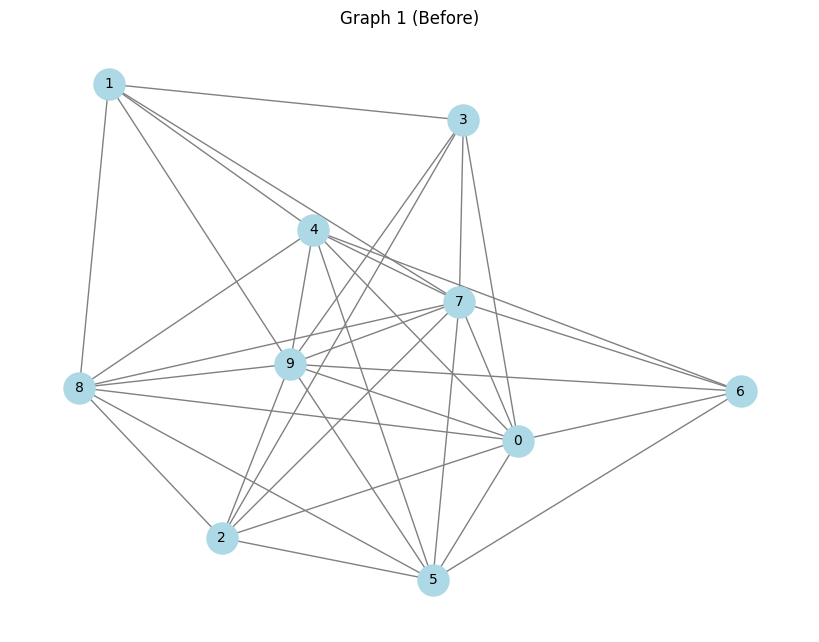

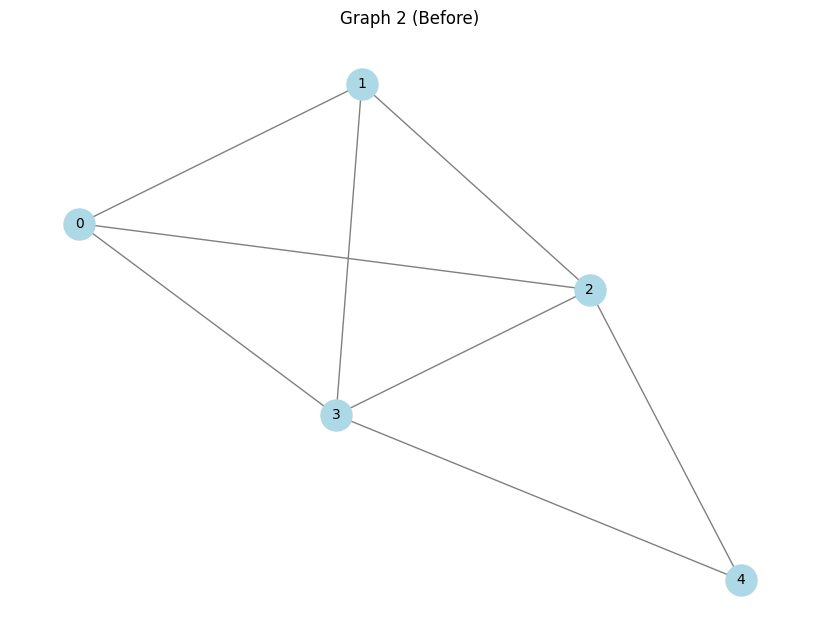

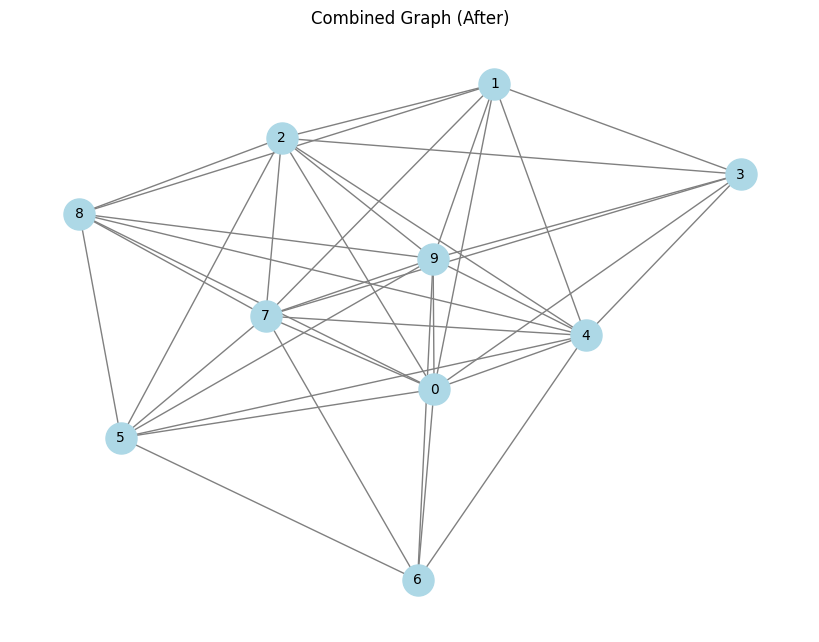

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def join_graphs_with_probability(graph1, graph2, p):
    """
    Connects two graphs by randomly adding edges between nodes of the first graph and the second graph
    with a given probability `p`.
    
    Args:
        graph1 (nx.Graph): The first graph.
        graph2 (nx.Graph): The second graph.
        p (float): The probability of adding an edge between a node in graph1 and a node in graph2.

    Returns:
        nx.Graph: A new graph containing both graph1 and graph2 with added edges.
    """
    # Create a new graph to combine graph1 and graph2
    combined_graph = nx.compose(graph1, graph2)
    
    # Get node sets of each graph
    nodes_g1 = list(graph1.nodes)
    nodes_g2 = list(graph2.nodes)
    
    # Add edges with probability p
    for node1 in nodes_g1:
        for node2 in nodes_g2:
            if random.random() < p:
                combined_graph.add_edge(node1, node2)
    
    return combined_graph

def display_graph(graph, title):
    """
    Displays a graph using networkx and matplotlib.
    """
    plt.figure(figsize=(8, 6))
    nx.draw(graph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)
    plt.title(title)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create two sample graphs
    G1 = nx.erdos_renyi_graph(10, 0.6)
    G2 = nx.erdos_renyi_graph(5, 0.6)
    
    # Display the initial graphs
    display_graph(G1, "Graph 1 (Before)")
    display_graph(G2, "Graph 2 (Before)")
    
    # Join the graphs with a probability of 0.3
    combined_graph = join_graphs_with_probability(G1, G2, p=0)
    
    # Display the combined graph
    display_graph(combined_graph, "Combined Graph (After)")


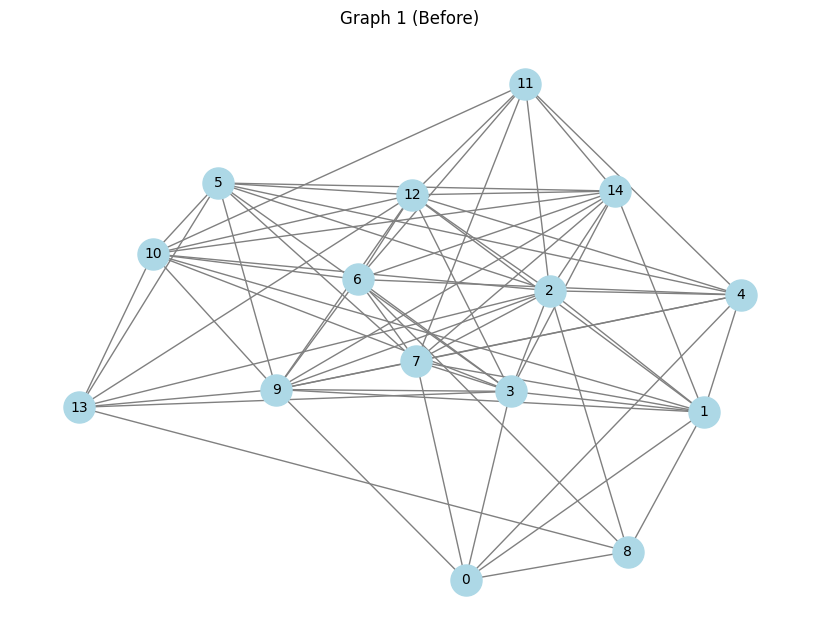

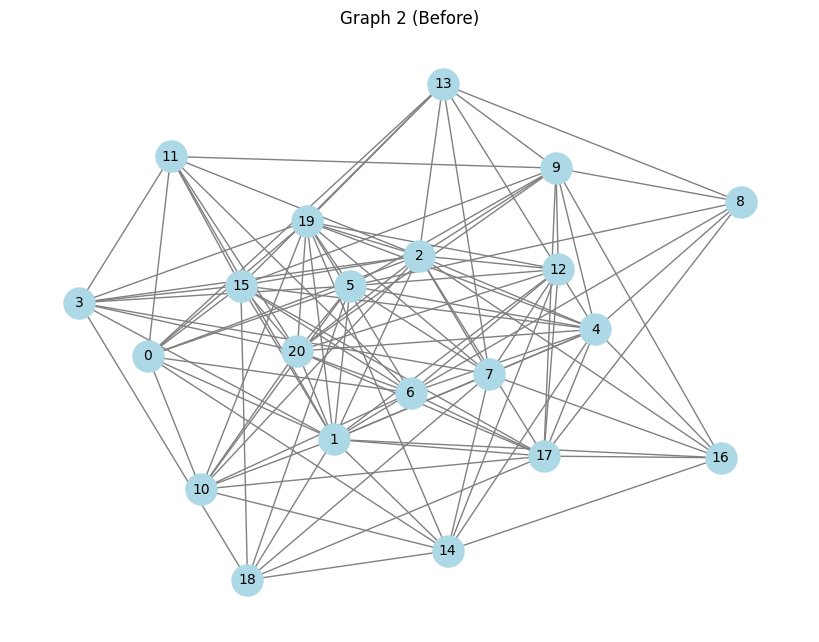

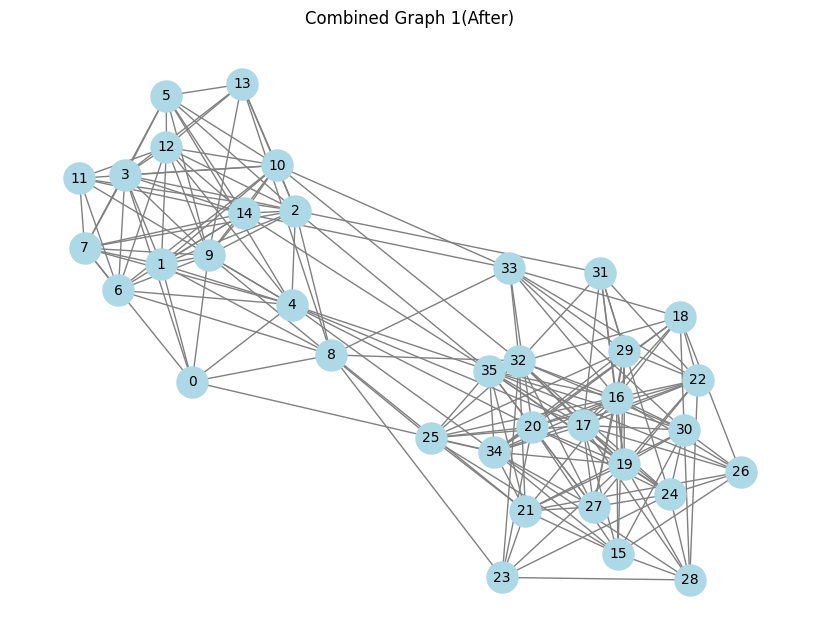

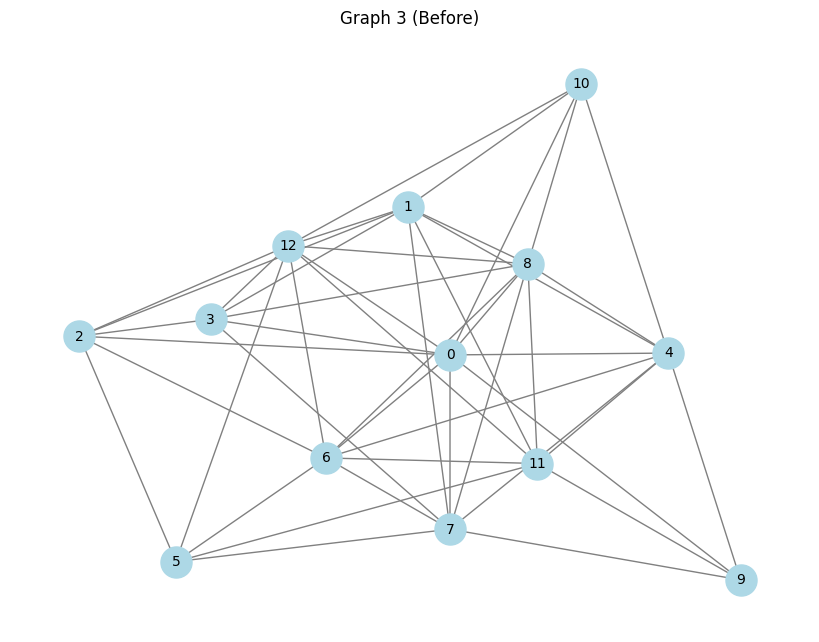

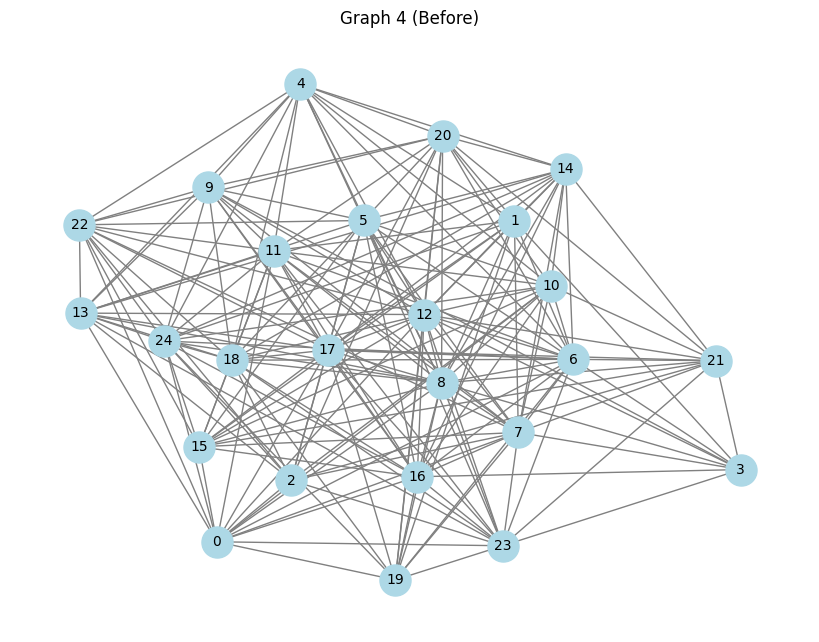

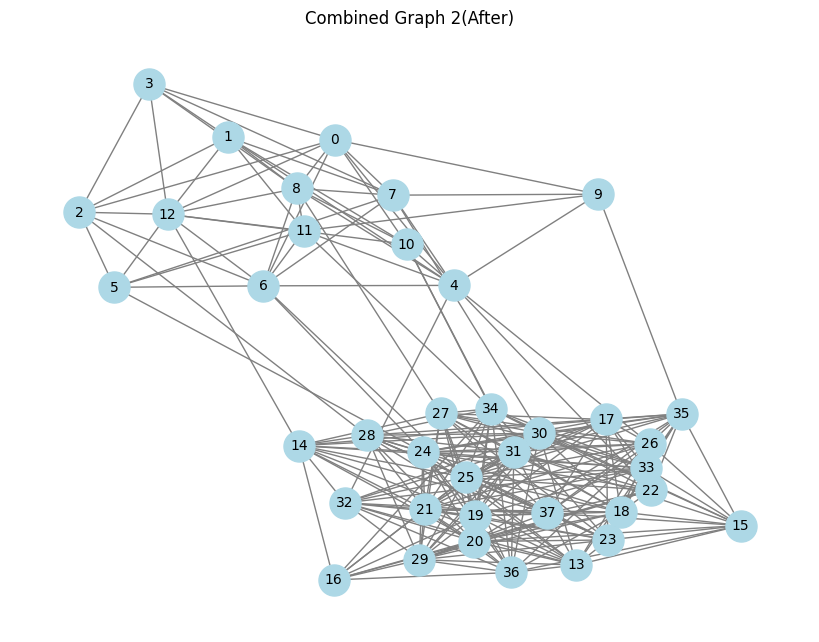

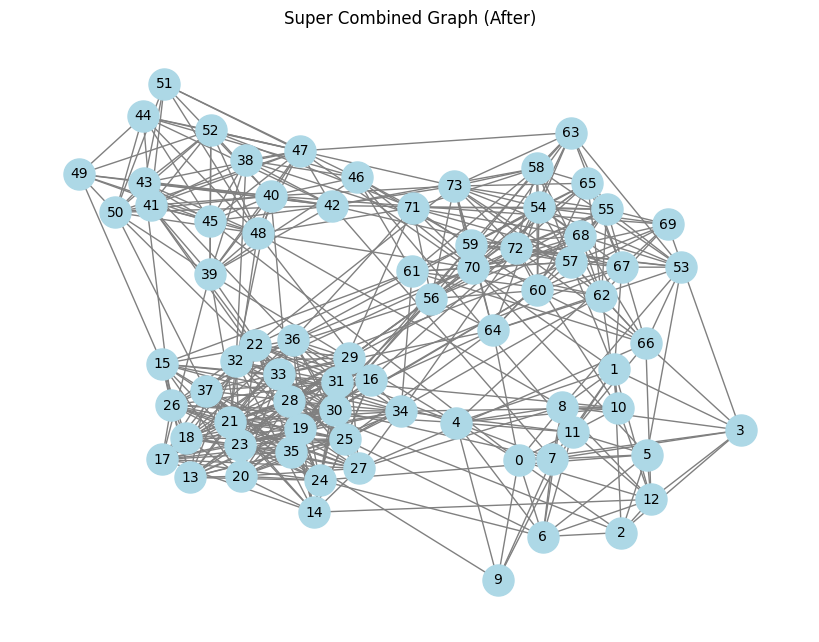

In [16]:
import networkx as nx
import random
import matplotlib.pyplot as plt


def relabel_graph_nodes(graph, label_prefix):
    """
    Relabels the nodes of a graph with a specified prefix.
    
    Args:
        graph (nx.Graph): The graph to relabel.
        label_prefix (str): The prefix to add to each node's label.
        
    Returns:
        nx.Graph: A graph with relabeled nodes.
    """
    mapping = {node: f"{label_prefix}_{node}" for node in graph.nodes}
    return nx.relabel_nodes(graph, mapping)

def make_graphs_disjoint(graph1, graph2):
    """
    Makes two graphs disjoint by relabeling the nodes of the second graph with an offset.
    
    Args:
        graph1 (nx.Graph): The first graph.
        graph2 (nx.Graph): The second graph.

    Returns:
        tuple: Two disjoint graphs.
    """
    # Calculate the offset based on the number of nodes in graph1
    offset = max(graph1.nodes) + 1 if len(graph1.nodes) > 0 else 0
    # Relabel nodes in graph2 with the offset
    graph2_disjoint = nx.relabel_nodes(graph2, lambda x: x + offset)
    return graph1, graph2_disjoint

def join_graphs_with_probability(graph1, graph2, p):
    """
    Connects two disjoint graphs by randomly adding edges between nodes of the first graph and the second graph
    with a given probability `p`.
    
    Args:
        graph1 (nx.Graph): The first graph.
        graph2 (nx.Graph): The second graph.
        p (float): The probability of adding an edge between a node in graph1 and a node in graph2.

    Returns:
        nx.Graph: A new graph containing both graph1 and graph2 with added edges.
    """
    # Make the graphs disjoint
    graph1, graph2 = make_graphs_disjoint(graph1, graph2)

    
    
    # Create a new graph to combine graph1 and graph2
    combined_graph = nx.compose(graph1, graph2)
    
    # Get node sets of each graph
    nodes_g1 = list(graph1.nodes)
    nodes_g2 = list(graph2.nodes)
    
    # Add edges with probability p
    for node1 in nodes_g1:
        for node2 in nodes_g2:
            if random.random() < p:
                combined_graph.add_edge(node1, node2)
    
    return combined_graph

def display_graph(graph, title):
    """
    Displays a graph using networkx and matplotlib.
    """
    plt.figure(figsize=(8, 6))
    nx.draw(graph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)
    plt.title(title)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create two sample graphs
    G1 = nx.erdos_renyi_graph(15, 0.6)
    G2 = nx.erdos_renyi_graph(21, 0.6)
    G3 = nx.erdos_renyi_graph(13, 0.6)
    G4 = nx.erdos_renyi_graph(25, 0.6)
    # Display the initial graphs
    display_graph(G1, "Graph 1 (Before)")
    display_graph(G2, "Graph 2 (Before)")
    
    # Join the graphs with a probability of 0.3
    combined_graph2 = join_graphs_with_probability(G1, G2, p=0.05)
    
    # Display the combined graph
    display_graph(combined_graph2, "Combined Graph 1(After)")
    
    # Display the initial graphs
    display_graph(G3, "Graph 3 (Before)")
    display_graph(G4, "Graph 4 (Before)")
    
    # Join the graphs with a probability of 0.3
    combined_graph1 = join_graphs_with_probability(G3, G4, p=0.02)
    
    # Display the combined graph
    display_graph(combined_graph1, "Combined Graph 2(After)")
    
    
     # Join the graphs with a probability of 0.3
    super_combined_graph1 = join_graphs_with_probability(combined_graph1, combined_graph2, p=0.05)
    
    # Display the combined graph
    display_graph(super_combined_graph1, "Super Combined Graph (After)")


c:\Users\Harri\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

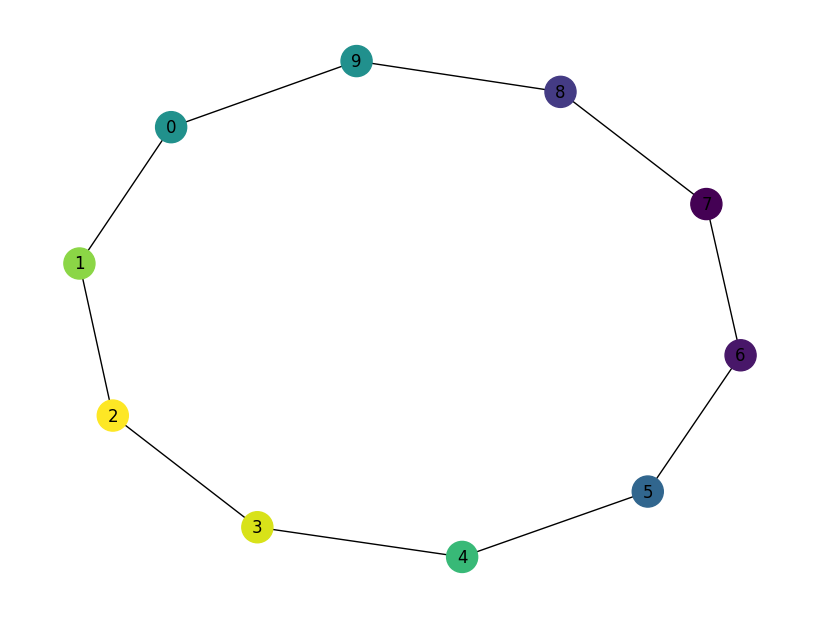

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a sample graph
G = nx.cycle_graph(10)

# Generate phase values for each node
# Example: Random phase values between 0 and 2π
phases = np.linspace(0, 2 * np.pi, len(G.nodes))

# Compute sin(phase) for each node
sin_values = np.sin(phases)

# Normalize sin(phase) values to the range [0, 1]
normalized_values = (sin_values - sin_values.min()) / (sin_values.max() - sin_values.min())

# Create a colormap
cmap = plt.cm.viridis  # Choose your favorite colormap

# Map normalized values to colors
colors = cmap(normalized_values)

# Draw the graph with node colors
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    node_color=colors,
    with_labels=True,
    node_size=500,
    cmap=cmap
)
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Normalized sin(phase)')
plt.show()

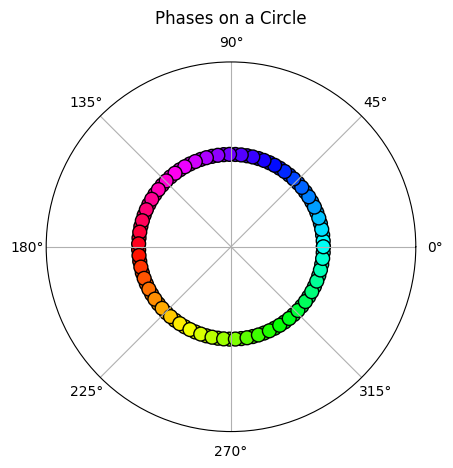

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_phases_on_circle(phases, colormap_name='hsv'):
    """
    Plot phases on a circle.

    Parameters:
        phases (numpy.ndarray): Array of phases in radians.
        colormap_name (str): Name of the matplotlib colormap.
    """
    # Normalize the phases to [-π, π]
    normalized_phases = (phases + np.pi) % (2 * np.pi) - np.pi

    # Map phases to a colormap
    colormap = plt.get_cmap(colormap_name)
    colormap_input = (normalized_phases + np.pi) / (2 * np.pi)
    colors = colormap(colormap_input)

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Plot each phase on the circle
    ax.scatter(normalized_phases, np.ones_like(normalized_phases), c=colors, s=100, edgecolor='k')

    # Formatting the plot
    ax.set_title("Phases on a Circle", va='bottom')
    ax.set_yticks([])  # Remove radial gridlines
    ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))  # Set angle labels
    ax.grid(True)

    plt.show()

# Example usage
if __name__ == "__main__":
    # Create an array of phases
    phases = np.linspace(-2 * np.pi, 2 * np.pi, 100)

    # Plot the phases on a circle
    plot_phases_on_circle(phases)


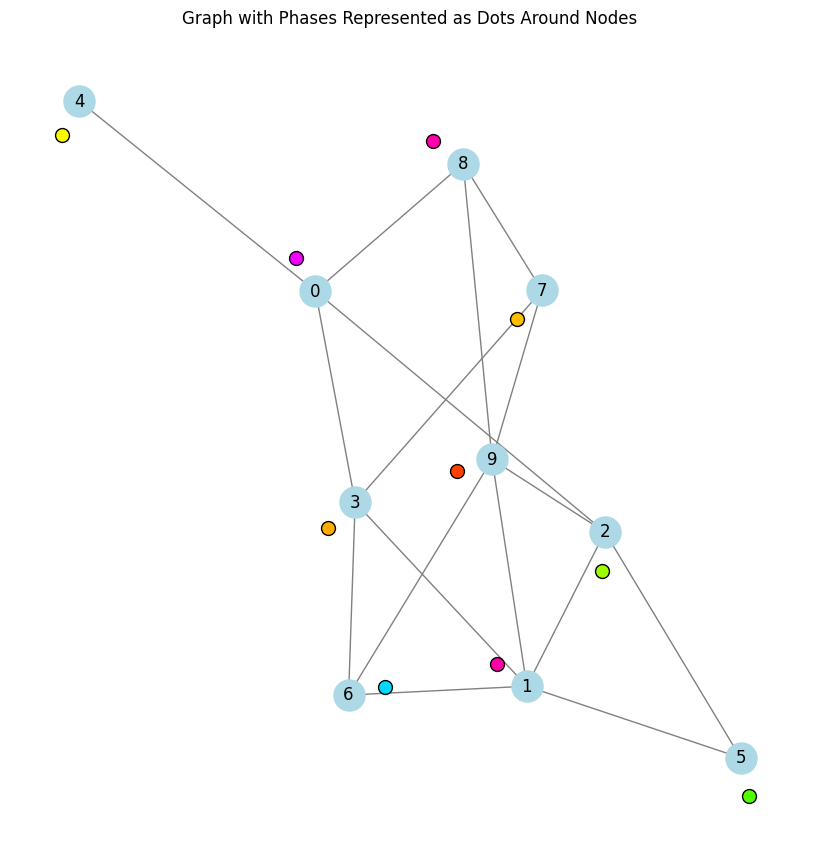

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def plot_graph_with_phases(graph, phases, colormap_name='hsv'):
    """
    Plot a NetworkX graph with dots around each node at positions determined by phases.

    Parameters:
        graph (networkx.Graph): The graph to plot.
        phases (dict): A dictionary mapping nodes to phases in radians.
        colormap_name (str): Name of the matplotlib colormap.
    """
    # Get positions for the graph layout
    pos = nx.spring_layout(graph)
    
    # Normalize the phases and map to a colormap
    colormap = plt.get_cmap(colormap_name)
    normalized_phases = {node: (phase + np.pi) % (2 * np.pi) - np.pi for node, phase in phases.items()}
    colormap_input = {node: (normalized_phases[node] + np.pi) / (2 * np.pi) for node in graph.nodes()}
    node_colors = {node: colormap(colormap_input[node]) for node in graph.nodes()}
    
    # Plot the graph
    plt.figure(figsize=(8, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

    # Add phase dots around each node
    for node, (x, y) in pos.items():
        # Get phase angle
        phase = normalized_phases[node]
        # Calculate dot position relative to the node
        dot_x = x + 0.1 * np.cos(phase)
        dot_y = y + 0.1 * np.sin(phase)
        # Plot the dot
        plt.scatter(dot_x, dot_y, color=node_colors[node], s=100, edgecolor='k', zorder=3)
    
    plt.title("Graph with Phases Represented as Dots Around Nodes")
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.erdos_renyi_graph(10, 0.3, seed=42)

    # Assign random phases to each node
    phases = {node: np.random.uniform(-np.pi, np.pi) for node in G.nodes()}

    # Plot the graph with phases
    plot_graph_with_phases(G, phases)


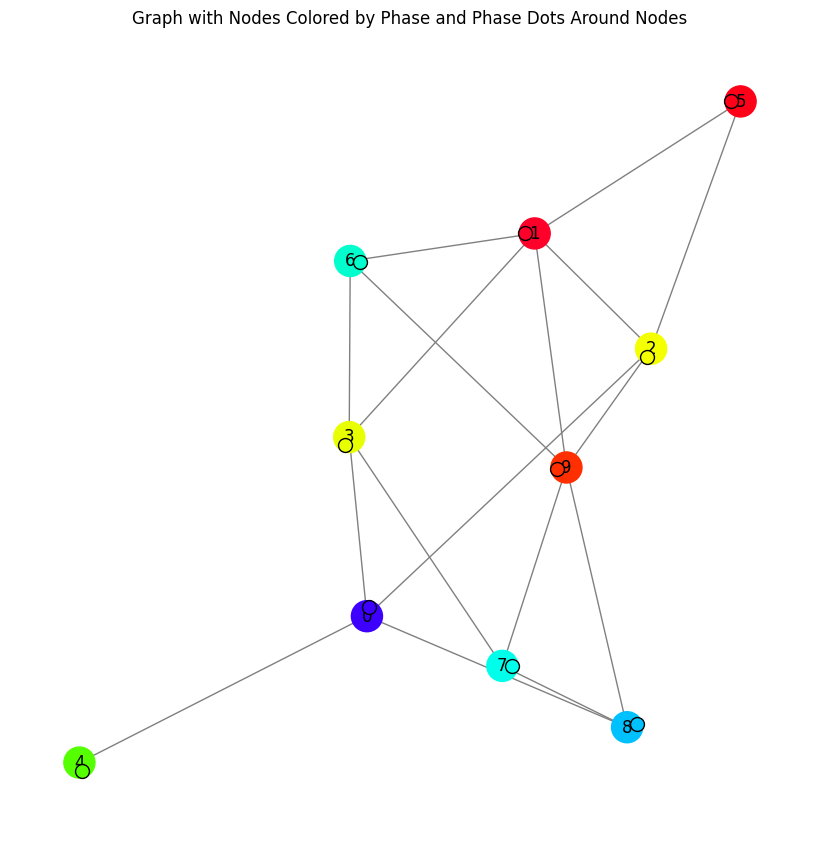

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def plot_graph_with_phases_as_colors(graph, phases, colormap_name='hsv'):
    """
    Plot a NetworkX graph where each node's color is determined by its phase,
    and each node has a dot around it at a position determined by the phase.

    Parameters:
        graph (networkx.Graph): The graph to plot.
        phases (dict): A dictionary mapping nodes to phases in radians.
        colormap_name (str): Name of the matplotlib colormap.
    """
    # Get positions for the graph layout
    pos = nx.spring_layout(graph)

    # Normalize the phases and map to a colormap
    colormap = plt.get_cmap(colormap_name)
    normalized_phases = {node: (phase + np.pi) % (2 * np.pi) - np.pi for node, phase in phases.items()}
    colormap_input = {node: (normalized_phases[node] + np.pi) / (2 * np.pi) for node in graph.nodes()}
    node_colors = [colormap(colormap_input[node]) for node in graph.nodes()]
    
    # Plot the graph with node colors based on their phases
    plt.figure(figsize=(8, 8))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        node_size=500,
        cmap=colormap,
    )

    # Add phase dots around each node
    for i, (node, (x, y)) in enumerate(pos.items()):
        # Get phase angle
        phase = normalized_phases[node]
        # Calculate dot position relative to the node
        dot_x = x + 0.025 * np.cos(phase)
        dot_y = y + 0.025 * np.sin(phase)
        # Plot the dot
        plt.scatter(dot_x, dot_y, color=node_colors[i], s=100, edgecolor='k', zorder=3)

    plt.title("Graph with Nodes Colored by Phase and Phase Dots Around Nodes")
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.erdos_renyi_graph(10, 0.3, seed=42)

    # Assign random phases to each node
    phases = {node: np.random.uniform(-2*np.pi, 2*np.pi) for node in G.nodes()}

    # Plot the graph with nodes colored by their phases
    plot_graph_with_phases_as_colors(G, phases)

